# Statistical Modeling

We will go through the following process:
   ** Explore data -> Fit model -> Evaluate model -> Deploy model**

In [1]:
# Import relevant libraries
import numpy as np 
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import missingno  

# Step 1. Explore Data

Perform exploratory analysis on the variables using the whole data set.
Describe the data and comment on your observations/findings.

##### The NHANES GH dataset contains various health-related measurements collected from participants. The dataset includes demographic information, medical history, and physical examination data.

#### Key Points of the Dataset:
1. Demographic Variables: Such as age, sex, and race/ethnicity.
2. Health Metrics: Including glycohemoglobin (GH), weight, height, BMI, various body circumferences, skinfold measurements, and blood markers like albumin, blood urea nitrogen, and creatinine.
3. Medical History: Information about whether the participants are on insulin or diabetes medications.


#### Response Variable:
The response variable in this dataset is likely to be diabetes, which is a binary variable indicating whether the participant has diabetes (often derived from the glycohemoglobin measurements, typically GH >= 6.5%).



In [2]:
#df = pd.read_excel('Glycohemoglobin_t1.xlsx')
#df = pd.read_excel('Glycohemoglobin_t3.xlsx')
#df = pd.read_excel('Glycohemoglobin_t4.xlsx')
df = pd.read_excel('Glycohemoglobin_t4_ShortName.xlsx')

In [3]:
df.head()

diabetes  Sex   Age  Race_Or_Ethnicity  Income_Min  Income_Max  \
0         0    1  34.2                  3     25000.0     35000.0   
1         0    1  16.8                  2     45000.0     55000.0   
2         1    0  60.2                  2     10000.0     15000.0   
3         0    1  26.1                  1     25000.0     35000.0   
4         0    0  49.7                  3     35000.0     45000.0   

   On_Insulin_or_Diabetes_Meds  Weight_Kg  Height_cm    BMI  Up_Leg_Len  \
0                            0       87.4      164.7  32.22        41.5   
1                            0       72.3      181.3  22.00        42.0   
2                            1      116.8      166.0  42.39        35.3   
3                            0       97.6      173.0  32.61        41.7   
4                            0       86.7      168.4  30.57        37.5   

   Up_Arm_Len  Arm_Cir  Waist_Cir  Triceps_Sk  Subscapular_Sk  Alibumin  \
0        40.0     36.4      100.4        16.4            24.9       4.8   
1        39.5     26.6       74.7        10.2            10.5       4.6   
2        39.0     42.2      118.2        29.6            35.6       3.9   
3        38.7     37.0      103.7        19.0            23.2       4.2   
4        36.1     33.3      107.8        30.3            28.0       4.3   

   Blood_Urea  Creatinine   gh  
0         6.0        0.94  5.2  
1         9.0        0.89  5.7  
2        10.0        1.11  6.0  
3         8.0        0.80  5.1  
4        13.0        0.79  5.3

<Axes: >

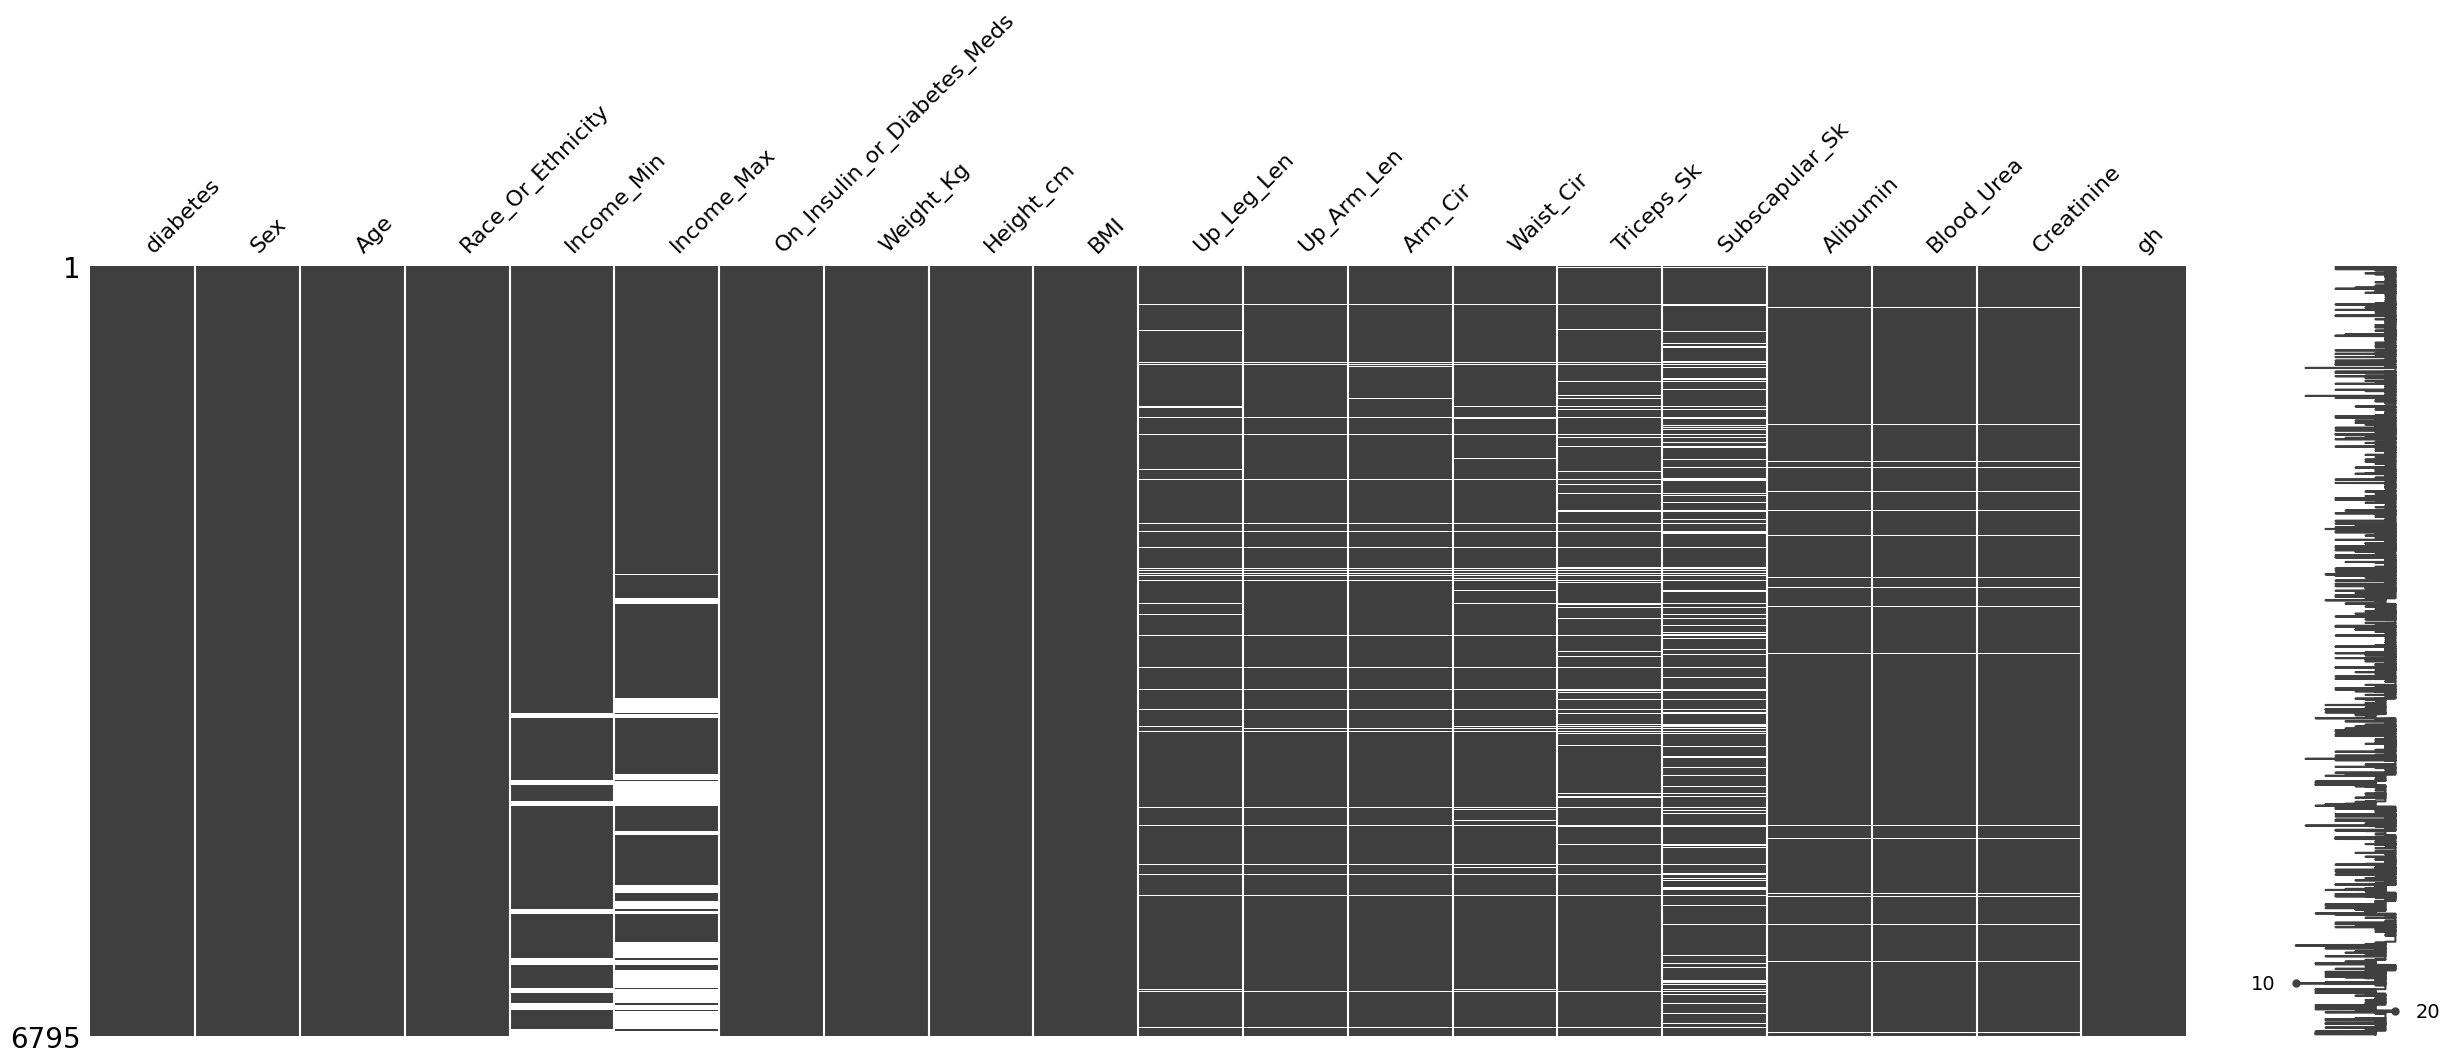

In [5]:
missingno.matrix(df, figsize = (30,10))

#### diabetes is a response variable.
#### On_Insulin_or_Diabetes Meds is a binary variable.
#### Race_Or_Ethnicity is a catogory variables.
#### The rest of the vaaluable are numeric or quantiative predictors.
#### Some of the predictors have missing values such as income_min, income_max, Suvscapular_Sk etc.

In [6]:
# To check data types, type: df.dtypes
df.dtypes

diabetes                         int64
Sex                              int64
Age                            float64
Race_Or_Ethnicity                int64
Income_Min                     float64
Income_Max                     float64
On_Insulin_or_Diabetes_Meds      int64
Weight_Kg                      float64
Height_cm                      float64
BMI                            float64
Up_Leg_Len                     float64
Up_Arm_Len                     float64
Arm_Cir                        float64
Waist_Cir                      float64
Triceps_Sk                     float64
Subscapular_Sk                 float64
Alibumin                       float64
Blood_Urea                     float64
Creatinine                     float64
gh                             float64
dtype: object

In [7]:
df.shape

(6795, 20)

# Descriptive Statistics

In [8]:
df.describe(include='all')

diabetes          Sex          Age  Race_Or_Ethnicity  \
count  6795.000000  6795.000000  6795.000000        6795.000000   
mean      0.134511     0.496247    44.293304           2.637233   
std       0.341225     0.500023    20.593529           1.088434   
min       0.000000     0.000000    12.000000           1.000000   
25%       0.000000     0.000000    25.700000           2.000000   
50%       0.000000     0.000000    43.800000           3.000000   
75%       0.000000     1.000000    61.300000           3.000000   
max       1.000000     1.000000    80.000000           5.000000   

          Income_Min     Income_Max  On_Insulin_or_Diabetes_Meds    Weight_Kg  \
count    6400.000000    5366.000000                  6795.000000  6795.000000   
mean    41262.500000   41764.815505                     0.091832    79.370625   
std     31013.885149   27238.504068                     0.288810    21.930903   
min         0.000000    5000.000000                     0.000000    28.000000   
25%     20000.000000   20000.000000                     0.000000    64.000000   
50%     35000.000000   35000.000000                     0.000000    76.300000   
75%     65000.000000   55000.000000                     0.000000    91.100000   
max    100000.000000  100000.000000                     1.000000   239.400000   

         Height_cm          BMI   Up_Leg_Len   Up_Arm_Len      Arm_Cir  \
count  6795.000000  6795.000000  6564.000000  6616.000000  6607.000000   
mean    167.042958    28.321741    38.409324    36.874607    32.485152   
std      10.264984     6.950110     3.876902     2.781616     5.297660   
min     123.300000    13.180000    20.400000    24.800000    16.800000   
25%     159.600000    23.430000    36.000000    35.000000    28.850000   
50%     166.600000    27.290000    38.400000    36.800000    32.100000   
75%     174.500000    31.880000    41.000000    38.800000    35.600000   
max     202.700000    84.870000    50.600000    47.000000    61.000000   

         Waist_Cir   Triceps_Sk  Subscapular_Sk     Alibumin   Blood_Urea  \
count  6556.000000  6314.000000     5824.000000  6706.000000  6706.000000   
mean     96.254149    18.787726       19.961556     4.273621    12.917686   
std      17.059193     8.319393        8.369083     0.326545     5.717571   
min      52.000000     2.600000        3.800000     2.500000     1.000000   
25%      83.500000    12.000000       13.000000     4.100000     9.000000   
50%      95.300000    17.900000       19.400000     4.300000    12.000000   
75%     106.900000    25.000000       26.200000     4.500000    15.000000   
max     179.000000    41.100000       40.400000     5.300000    90.000000   

        Creatinine           gh  
count  6706.000000  6795.000000  
mean      0.878627     5.676586  
std       0.445238     0.964700  
min       0.140000     4.000000  
25%       0.700000     5.200000  
50%       0.830000     5.500000  
75%       0.980000     5.800000  
max      15.660000    16.400000

#### Heatmap Visualization: The heatmap provides a visual representation of the Pearson correlation coefficients between pairs of variables in the dataset.
#### Color Scale: The color scale ranges from -1 (dark blue) to +1 (dark red), indicating the strength and direction of the correlation. Red signifies a strong positive correlation, blue signifies a strong negative correlation, and white indicates no correlation.

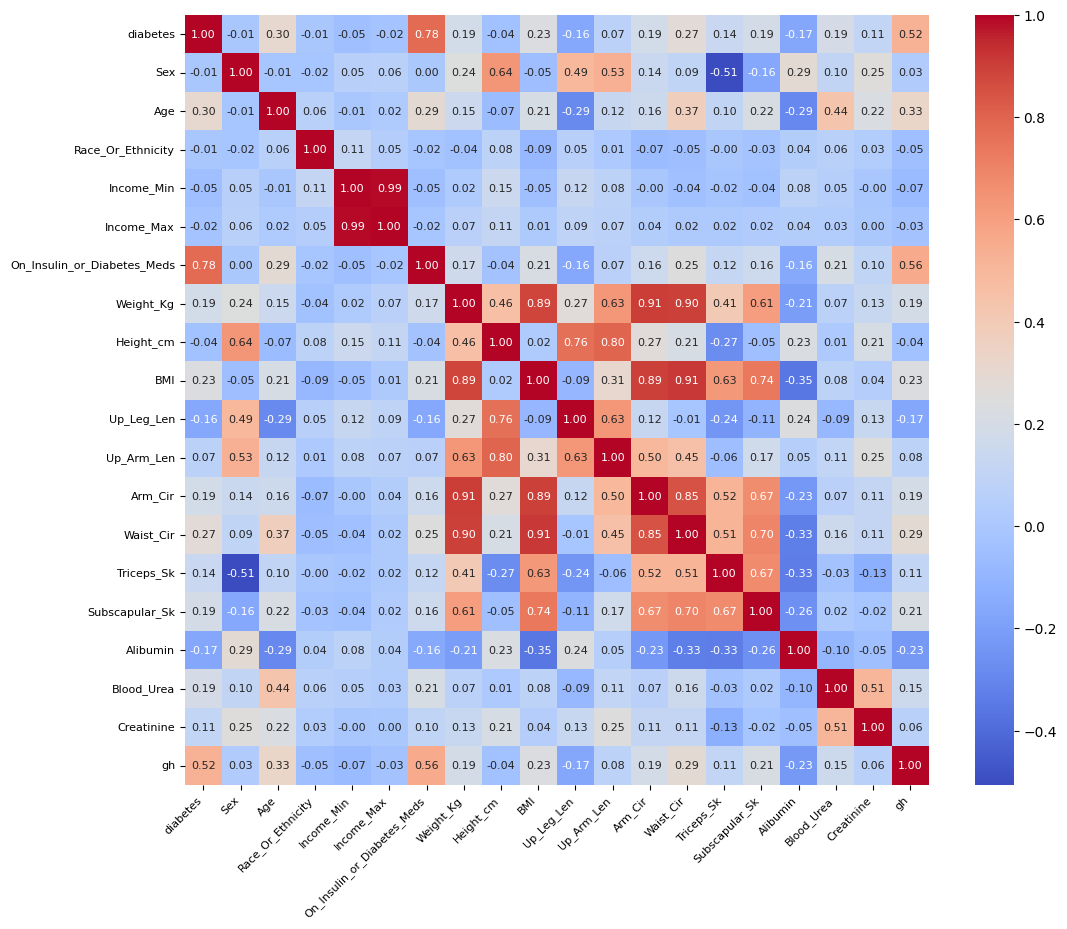

In [9]:
# To visualise correlation matrix in a heatmap, type: sns.heatmap(df.corr(), annot=True, cmap='coolwarm');
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm');
plt.figure(figsize=(12, 10))  # Adjust the figure size
heatmap = sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=8)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=8)
plt.show()

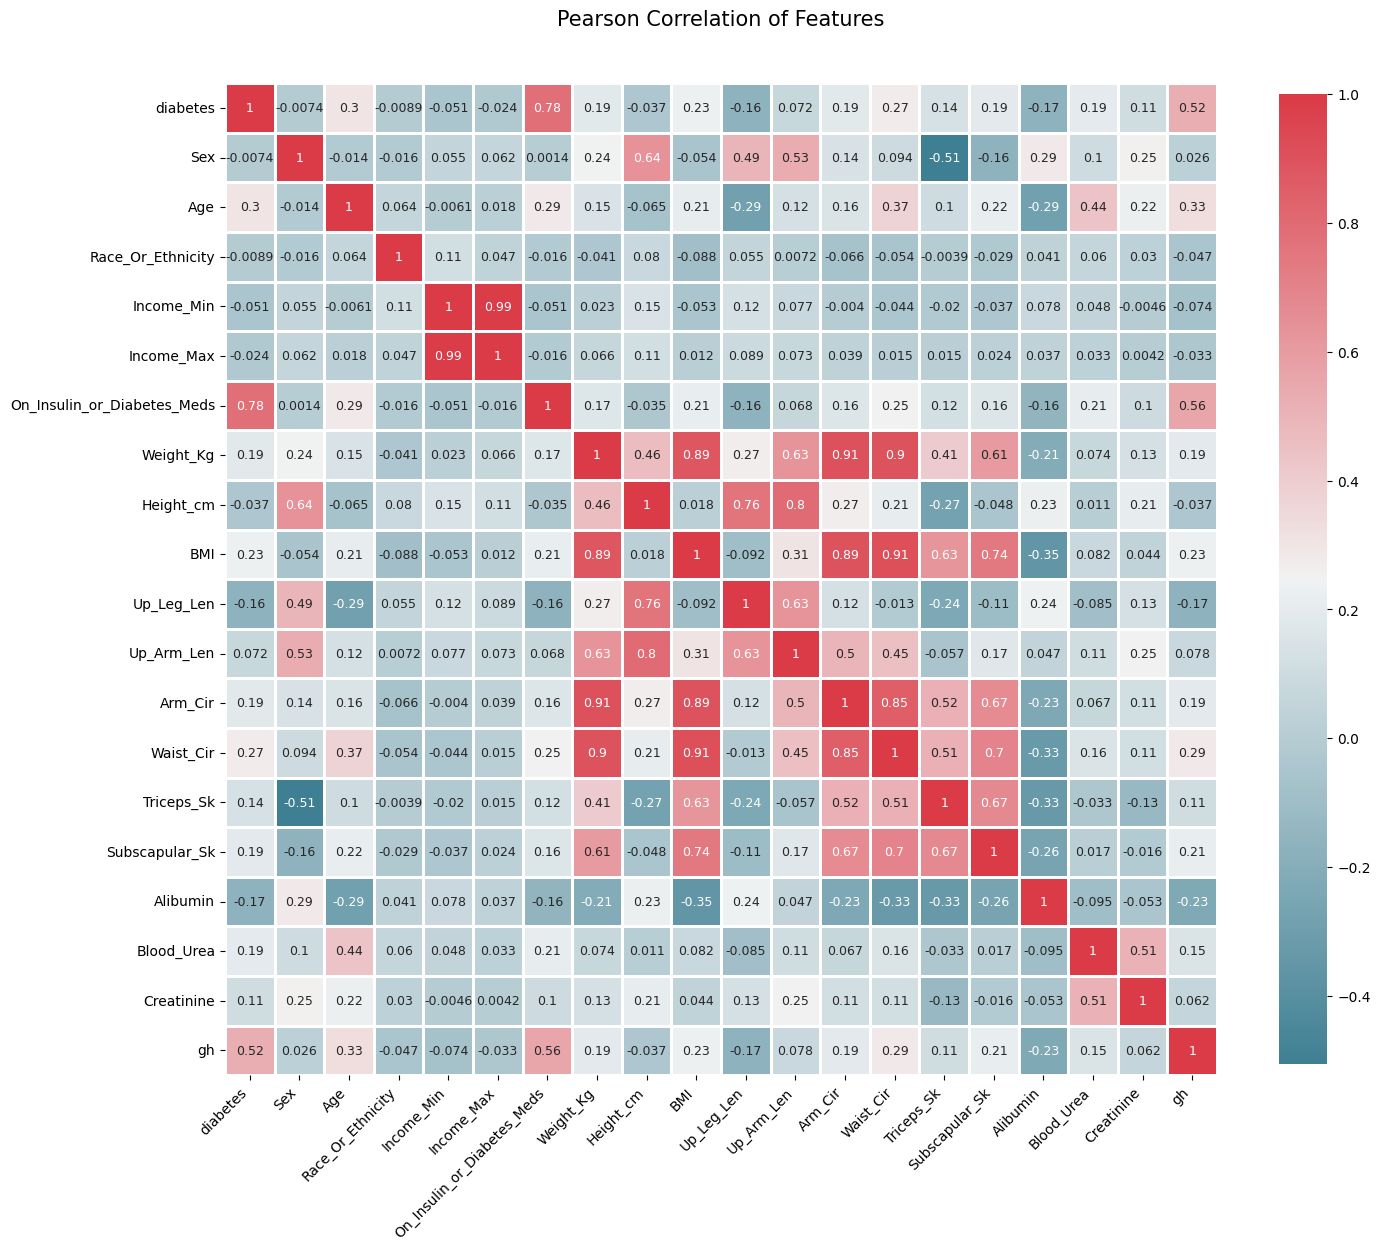

In [11]:
def correlation_heatmap(df):
    plt.figure(figsize=(16, 14))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    
    sns.heatmap(
        df.corr(), 
        cmap=colormap,
        square=True, 
        cbar_kws={'shrink': 0.9}, 
        annot=True, 
        linewidths=0.9,
        vmax=1.0, 
        linecolor='white',
        annot_kws={'fontsize': 9}
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.show()

# Assuming 'df' is your DataFrame
correlation_heatmap(df)

The heatmap displays the Pearson correlation coefficients between various features in the dataset. Here's a brief description of the heatmap:

1. Diagonal Elements: All diagonal elements are 1, indicating that each feature is perfectly correlated with itself.

2. Target Variable (diabetes):

    - gh (Glycohemoglobin) has a high positive correlation with diabetes (0.52).
    - On_Insulin_or_Diabetes_Meds also has a strong positive correlation with diabetes (0.78).

3. High Positive Correlations:
    - Income_Min and Income_Max have a perfect positive correlation (0.99), suggesting they represent similar information.
    - Upper_Leg_Length_cm and Upper_Arm_Length_cm have a high positive correlation (0.76).

4. High Negative Correlations:
    - Triceps_Skinfold_mm and Sex have a moderately strong negative correlation (-0.51).

5. General Observations:

    - Most features have low to moderate correlations with each other, indicating that they are relatively independent.
    - There are some notable clusters of higher correlations among anthropometric measurements (e.g., BMI, Height_cm, Weight_Kg).
    - Age shows a moderate positive correlation with Blood_Urea_Nitrogen_mg/dL and a moderate negative correlation with Height_cm.

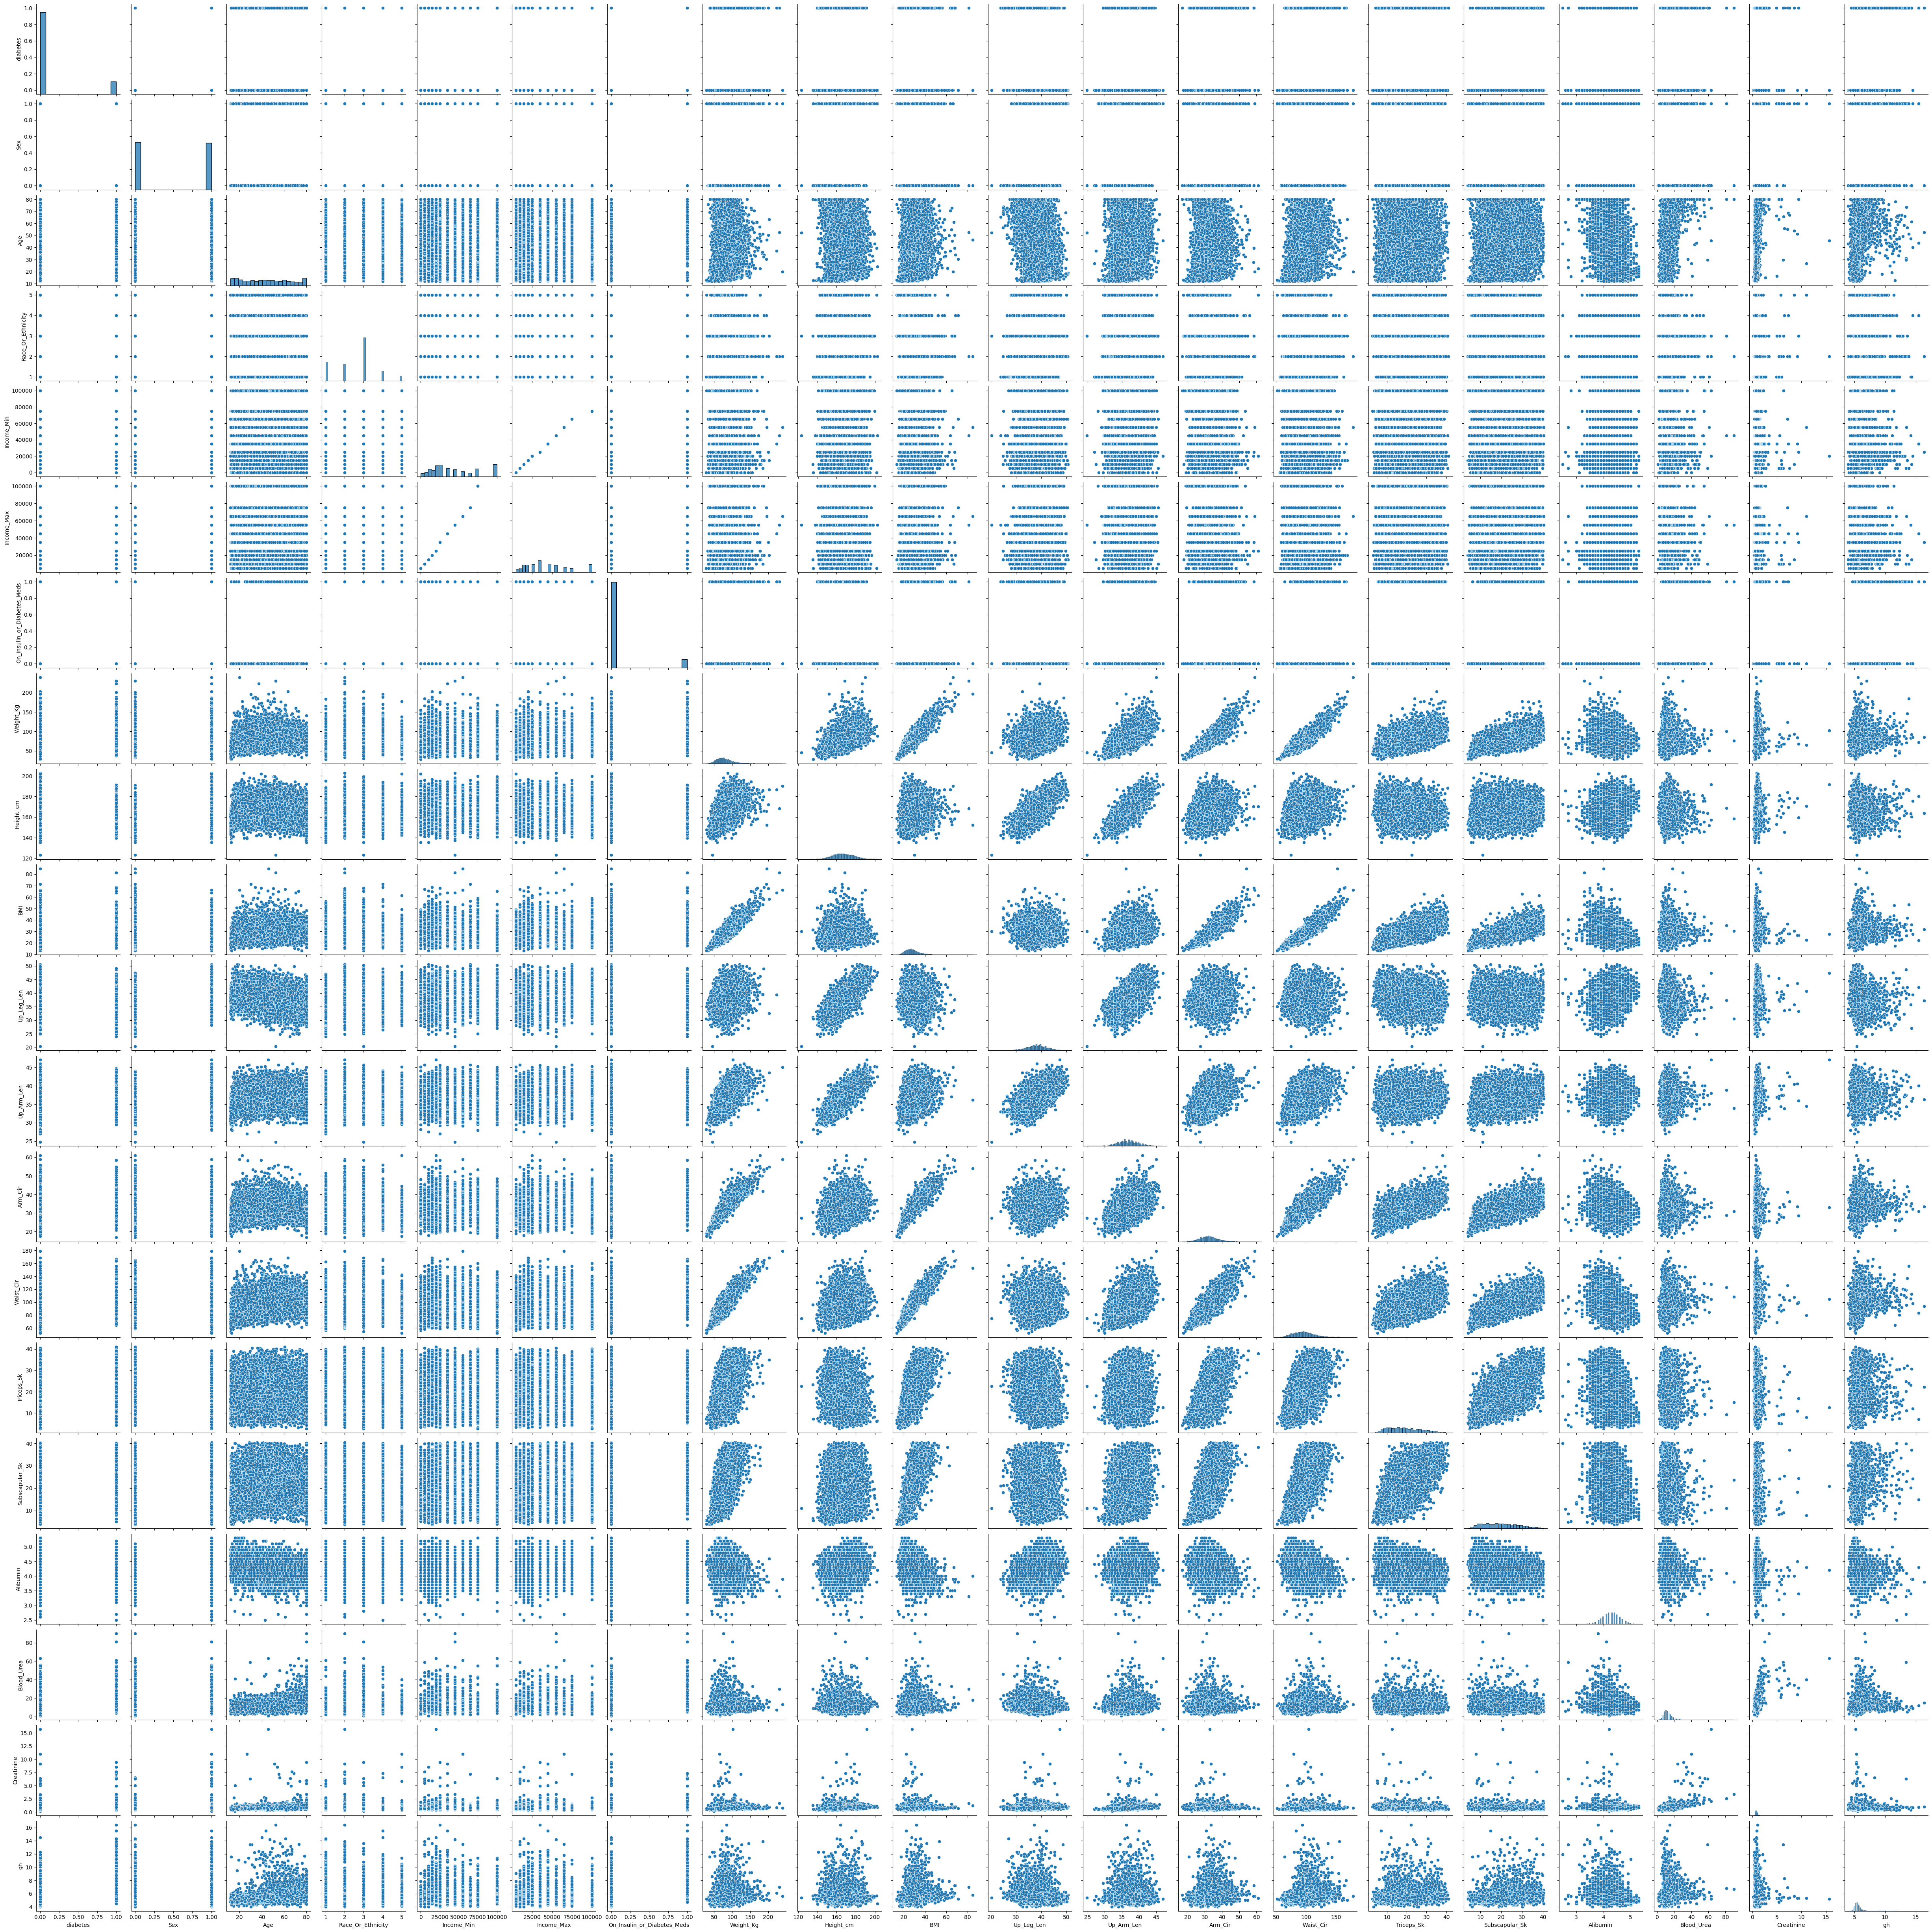

In [12]:
# To visualise pairwise relationship using Seaborn pairplot, type: sns.pairplot(df);
# Caution: It may take some time to generate a pairplot, especially when number of features is large.
sns.pairplot(df);

The pairplot or scatterplot matrix is used to visualize the pairwise relationships between multiple variables in a dataset. Here’s a brief description of the plot:

- Diagonal: The diagonal of the pair plot typically contains histograms or kernel density estimates (KDEs) of each variable, showing the distribution of individual variables.

- Upper Triangle: The upper triangle contains scatter plots of the pairwise combinations of variables. These plots help to identify relationships, correlations, or patterns between pairs of variables.

- Lower Triangle: The lower triangle is usually a mirror image of the upper triangle, showing the same scatter plots for pairwise combinations of variables.

- Axes: Each row and column represent a different variable from the dataset. The axes labels indicate the variable names.

1. Distribution of Individual Variables:

    - The histograms or KDE plots along the diagonal show the distribution of each variable.
    - Some variables appear to be normally distributed, while others show skewness or bimodal distributions.

2. Linear Relationships:

    - There are several pairs of variables that exhibit a clear linear relationship, as indicated by the elliptical shape of the scatter plots. This suggests a strong correlation between these pairs.

3. Non-linear Relationships:

    - Some scatter plots show curved patterns, indicating non-linear relationships between variables.

4. Clusters:

    - There are several scatter plots where data points are clustered into distinct groups, suggesting the presence of subgroups within the data.

5. Outliers:

    - Certain scatter plots show outliers that deviate significantly from the main cluster of data points.

6. Discrete Variables:

    - Some scatter plots exhibit a striped pattern, indicating that one or both variables are discrete or categorical.

7. Symmetry:

    - The pair plot is symmetrical across the diagonal, meaning the scatter plot for variable 𝐴 vs. 𝐵 is mirrored by the plot for 𝐵 vs. 𝐴 

The scatter plots in the upper and lower triangles provide a visual way to detect linear or non-linear relationships, clusters, outliers, and other patterns within the data. The pair plot is especially useful for exploring the relationships in a dataset with multiple numerical variables. These observations can help in understanding the underlying structure of the data, identifying patterns and relationships, and guiding further analysis or modeling efforts.

# Step 2. Fit Model (default or basic)

Split the data set into training set and testing set in a (approximate) ratio 75:25.
Set random state/seed using the last 4 digits of your SP admission number.
Fit the full additive MLR model on the training set.

#### Build a full MLR model for Response Varible (diabetes) using the predictors (i.e Race, BMI, gh:Glycohemoglobin etc).

In [14]:
# Split data set into 75:25.

from sklearn.model_selection import train_test_split
dftrain, dftest = train_test_split(df, test_size=0.25, random_state=1938)

# If you want to confirm ratio splitted:
print( len(dftrain)/len(df) )
print( len(dftest)/len(df) )

0.749963208241354
0.25003679175864607


In [15]:
#mlr_full = ols("diabetes ~ Sex + Age + Race_Or_Ethnicity + Income_Min +	Income_Max + On_Insulin_or_Diabetes_Meds + Weight_Kg + Height_cm + BMI + Upper_Leg_Length_cm + Upper_Arm_Length_cm + Arm_Circumference_cm + Waist_Circumference_cm + Triceps_Skinfold_mm + Subscapular_Skinfold_mm  + Albumin_g-dL + Blood_urea_nitrogen_mg-dl + Creatinine_mg-dl + gh#", dftrain).fit()
#mlr_full = ols(
#    "diabetes ~ Sex + Age + Race_Or_Ethnicity + Income_Min + Income_Max + On_Insulin_or_Diabetes_Meds + " 
#    "Weight_Kg + Height_cm + BMI + Upper_Leg_Length_cm + Upper_Arm_Length_cm + Arm_Circumference_cm + " 
#    "Waist_Circumference_cm + Triceps_Skinfold_mm + Subscapular_Skinfold_mm + Albumin_g_dL + " 
#    "Blood_urea_nitrogen_mg_dl + Creatinine_mg_dl + gh", dftrain
#).fit()

formula = (
    "diabetes ~ Sex + Age + Race_Or_Ethnicity + Income_Min + Income_Max + On_Insulin_or_Diabetes_Meds + Weight_Kg + Height_cm + BMI + Up_Leg_Len + Up_Arm_Len + Arm_Cir + Waist_Cir + Triceps_Sk + Subscapular_Sk + Alibumin + Blood_Urea + Creatinine + gh"
)
mlr_full = ols(formula, dftrain).fit()

print(mlr_full.summary())
print('\nMSE =', mlr_full.mse_resid)

                            OLS Regression Results                            
Dep. Variable:               diabetes   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     265.9
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        11:40:06   Log-Likelihood:                 608.35
No. Observations:                3238   AIC:                            -1177.
Df Residuals:                    3218   BIC:                            -1055.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

# Step 3: Evaluate Model

Conduct relevant diagnostics on the full MLR model fitted.
Evaluate the model from the perspectives of model fit, prediction accuracy, model/predictor significance, and checking of assumptions.

How well does the model fit the data?
Is the model likely to be useful for prediction?
Are any of the basic assumptions violated?

We can perform the following dianostics:
- Check goodness of fit ($R^2$)
- Check accuracy (MSE)
- Test the slope and overall model
- Check assumptions by producing residual plots

## _Check goodness of fit ($R^2$) and accuracy (MSE)_

In [16]:
# To extract Rsq value, type: modelname.rsquared
mlr_full.rsquared

0.6109219787321869

### 61%, moderate fit, of the variability , Adj, R-Sqr is 60.9%

## _Check assumptions: normality_

We can use visualizations or run statistical tests to check if residuals satisfy the normality assumption.
- Histogram of residual should be bell-shaped.
- QQ plot of residuals should be a diagonal straight line.
- [Jarque-Bera test](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test): we want to see "large" p-value so as not to reject normality. [[Documentation]](https://www.statsmodels.org/dev/generated/statsmodels.stats.stattools.jarque_bera.html#statsmodels.stats.stattools.jarque_bera)
- Ominibus test: we want to see "large" p-value so as not to reject normality. See references in [statsmodel](https://www.statsmodels.org/dev/generated/statsmodels.stats.stattools.omni_normtest.html#statsmodels.stats.stattools.omni_normtest) or the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).

In [17]:
# To produce residual plots, we have to extract the residuals first. Type: residname = modelname.resid
res = mlr_full.resid
len(res)

3238

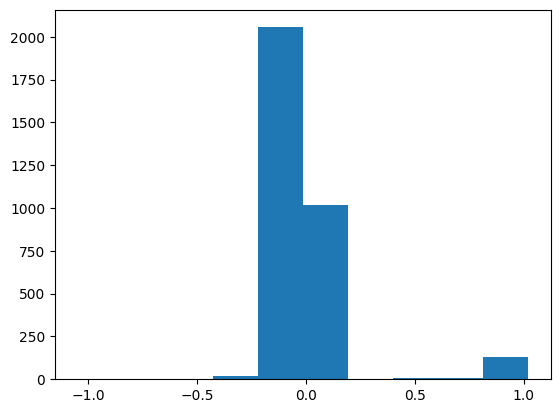

In [18]:
# Check whether residuals are normally distributed visually in a histogram.
# Type: plt.hist(residname);
plt.hist(res);

C:\Users\match\AppData\Local\Temp\ipykernel_15732\3384519445.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res);


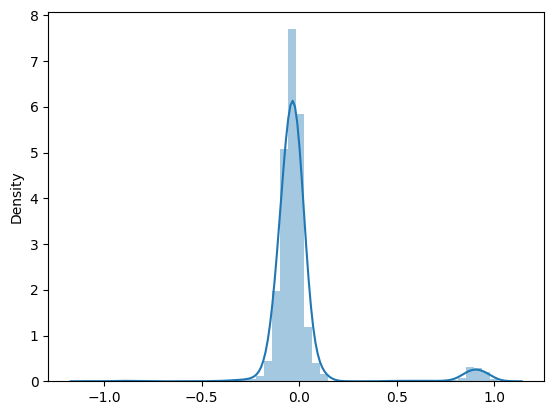

In [19]:
# Alternatively, use a distribution plot which is a histogram with a smooth curve fitted to it.
# Type: sns.distplot(residname);
sns.distplot(res);


The plot shown is a histogram with an overlaid kernel density estimate (KDE) plot. Here’s a detailed description of the plot based on the dataset:

#### General Description

- Histogram: The bars represent the frequency distribution of a single variable from the dataset.
- KDE Plot: The smooth line represents the kernel density estimate, which provides a continuous estimate of the variable’s probability density function.

#### Observations 

Distribution:

- The variable appears to have a highly peaked distribution centered around 0.
- There is a secondary, smaller peak around 1.
- The distribution is not symmetric, with more data concentrated around the center peak and some spread toward positive values.

Skewness:

- The primary peak at 0 suggests that most data points are concentrated near this value.
- The presence of a secondary peak around 1 indicates a bimodal characteristic, although the second peak is much smaller.

Density:

- The KDE curve confirms the sharp peak at 0 and the smaller peak at 1, providing a smoother view of the data distribution compared to the histogram.
- The density drops off quickly on either side of the main peak, indicating a narrow spread of values around 0.

Outliers:

- There are very few data points beyond the range of -1 to 1, suggesting limited outliers.

#### Interpretation

Central Tendency:

- The high peak around 0 suggests that the central value of the variable is very close to 0.

Bimodal Nature:

- The smaller peak around 1 indicates a secondary mode, which might represent a subpopulation or specific condition in the dataset.

Data Spread:

- The narrow spread around the primary peak shows that most values are concentrated near the central tendency, with very few values deviating significantly.

#### Possible Variable Context

Given the nature of the distribution, the variable could represent a standardized or normalized measure where most data points cluster around a mean value of 0. The secondary peak around 1 might indicate a different category or group within the data that exhibits distinct behavior.

#### Conclusion

This plot provides valuable insights into the distribution of the variable, highlighting its central tendency, skewness, and the presence of bimodal characteristics. Understanding this distribution is crucial for further analysis, such as identifying relationships with other variables or preparing the data for modeling.

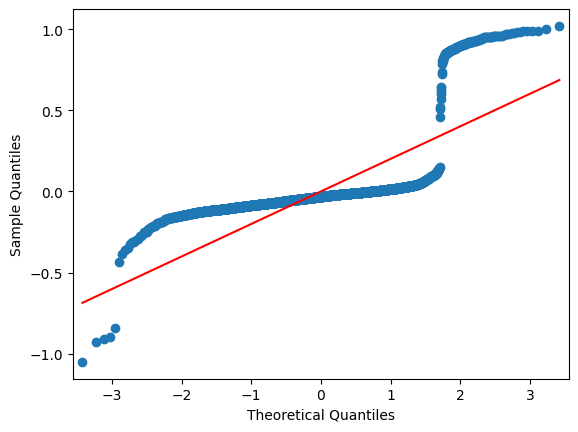

In [20]:
# Construct a QQ plot of residuals. Type: sm.qqplot(residname, line='s');
sm.qqplot(res, line='s');

To check normality or residuals:

This QQ plot show errors are not normally distributed.

## To perform the Jarque-Bera test on residuals, type: sm.stats.jarque_bera(residname)
#### The function returns: JB test statistic, p-value, estimated skewness, estimated kurtosis


In [21]:
sm.stats.jarque_bera(res)

(38848.42964160138, 0.0, 3.661758118458597, 18.30718780710834)

## To perform the Omnibus test on residuals, type: sm.stats.omni_normtest(residname)

In [22]:
sm.stats.omni_normtest(res)

NormaltestResult(statistic=2480.587237064726, pvalue=0.0)

## Conduct Shapiro-Wilk normality test. The function returns test statistics and P-value.

In [23]:
from scipy.stats import shapiro
shapiro(res)

ShapiroResult(statistic=0.4599756598472595, pvalue=0.0)

## Two ways to to conduct Anderson-Darling normality test
#### One uses the scipy library, and one uses the statsmodel library
#### scipy: returns test statistic and critical values. Reject H0 if test statistic > critical value
#### statsmodel: returns test statistics and P-value

In [24]:
from scipy.stats import anderson
anderson(res)

AndersonResult(statistic=601.5140106083691, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-4.4162600966201226e-13, scale=0.20055581564425068)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [25]:
sm.stats.normal_ad(res)

(601.5140106083645, 0.0)

## _Check Assumption: Homoscedasticity_ (constant variance)

We can use visualization or run statistical test to check if residuals satisfy the homoscedasticity assumption.
- Plot of residuals vs. fitted values should be "bounded in a horizontal band".
- [Breusch–Pagan test](https://en.wikipedia.org/wiki/Breusch%E2%80%93Pagan_test): we want to see "large" p-value so as not to reject homoscedasticity. [[Documentation]](https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.het_breuschpagan.html#statsmodels.stats.diagnostic.het_breuschpagan)

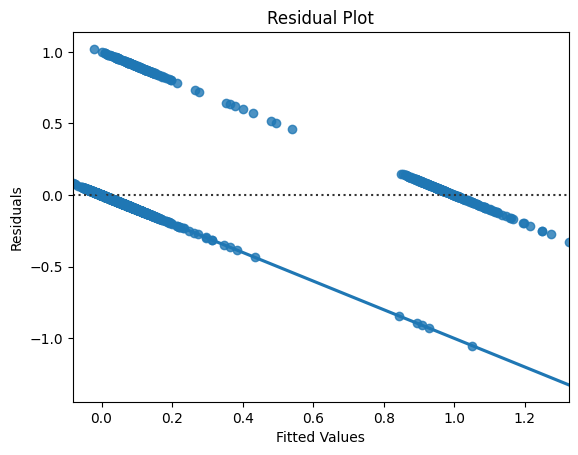

In [26]:
sns.residplot(x=mlr_full.fittedvalues, y=res, lowess=True)
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

The points show two linear model which is inappropriate.

In [27]:
# Perform the Breusch-Pagan test on residuals. Type: sm.stats.het_breuschpagan(residname, modelname.model.exog)
# The function returns: Lagrange multiplier statistic, p-value, F-value for B-P Constant Variance, F p-value
sm.stats.het_breuschpagan(res, mlr_full.model.exog)

(172.06439135842388,
 1.120159231310755e-26,
 9.50518145313247,
 1.7492470076191728e-27)

#### Reject H0 (p-value = 1.1201)
#### Non-constant variance, even non-linear effect

## _Check assumptions: independence_

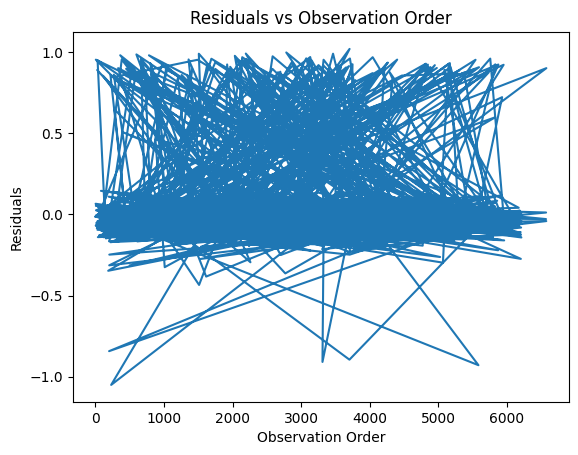

In [28]:
# Plot a line chart of the residuals, according to their observed order, to visually check independence.
# Type: 
plt.plot(res);
# Add in titles and axes labels
plt.title('Residuals vs Observation Order')
plt.xlabel('Observation Order')
plt.ylabel('Residuals');

#### No autocorrelation, However, we can see two patterns.

# Perform the Durbin-Watson test on residuals. Type: sm.stats.durbin_watson(residname)

In [29]:
sm.stats.durbin_watson(res)
# no autocorrelation

2.045914204347445

## _Multicollinearity_

We can check for multicollinearity in the data set by:
- Visually inspect the correlation matrix for correlated predictors.
- Check the [condition number](https://en.wikipedia.org/wiki/Condition_number).  As a general rule of thumb, if the condition number is more than 30, the regression model may have multicolliearity problem. This is a matrix algebra method. In Statsmodel, summary output will automatically highlight multicollinearity issue if the condition number is too high.
- Check the [Variance Inflation Factor](https://en.wikipedia.org/wiki/Variance_inflation_factor) (VIF) method. As a rule of thumb, we interpret VIF for each predictor as follows:

| VIF | Interpretation |
| ----- | ----- |
| VIF = 1 | Not correlated |
| 1<VIF<5 | Moderately correlated |
| VIF > 5 | Highly correlated |

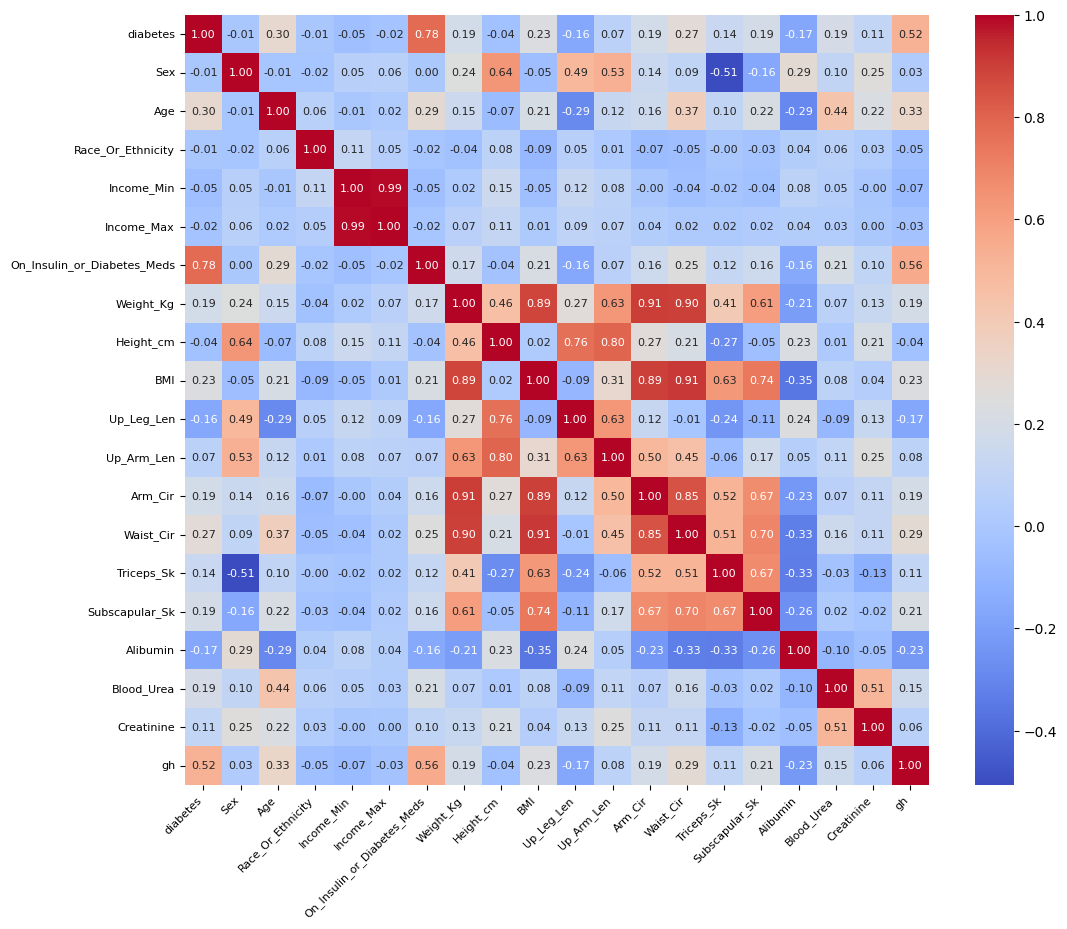

In [30]:
# Construct a heatmap to check correlations between predictors.
plt.figure(figsize=(12, 10))  # Adjust the figure size
heatmap = sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=8)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=8)
plt.show()

No serious multicollinearity, continue to check

In [31]:
# To extract condition number, type: modelname.condition_number
mlr_full.condition_number # for the whole model
#still acceptable, why so high? 

5068760.69800072

### Condition Number is high  (5068760.6)

# Check Multicollinearity (VIF)
#### To print out all VIFs by a "for" loop:

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# Determine the number of predictors
num_predictors = len(mlr_full.model.exog_names)

# Loop through each predictor to calculate VIF
for i in range(num_predictors):
    predictor = mlr_full.model.exog_names[i]
    VIF = vif(mlr_full.model.exog, i)
    print(predictor, VIF)

Intercept 6389.317868861221
Sex 2.8787449608698688
Age 2.2290836842231854
Race_Or_Ethnicity 1.0678220297686123
Income_Min 77.22502762694421
Income_Max 77.21086759190354
On_Insulin_or_Diabetes_Meds 1.4916494583292275
Weight_Kg 88.64068849733286
Height_cm 25.671515942510204
BMI 68.7191015411717
Up_Leg_Len 3.280300323715118
Up_Arm_Len 4.283182038790671
Arm_Cir 7.6693922110635455
Waist_Cir 10.732482118563432
Triceps_Sk 3.7365812389703557
Subscapular_Sk 2.9716903309761515
Alibumin 1.355190950008615
Blood_Urea 1.5609375515170838
Creatinine 1.4694911937463215
gh 1.6017062800324287


### For Sex, Age, Race and On_Insulin_or_Diabetes_Med, Up_Leg_Len, Up_Arm_Len are not correlated
### On_Insulin_or_Diabetes_Meds, Triceps_Sk, Subscapular_Sk, Alibumin, Blood_Urea, Creatinin and gh (Glycohemoglobin) are moderately correlated
### Income_Min  and Income_Max, Weight_Kg, Height_cm, BMI, Arm_Cir, Waist_Cir,  are highly correlated

# Step 4: Improve Model
#Improve the model using at least 4 of the following techniques where appropriate:
* Removing outlier(s) (if any)
* Centering and/or standardizing of variables
* Principal component analysis (PCA)
* Transformation of variables
* Interaction of variables
* Variable selection

Explain how the model is improved after applying each of the techniques.
* [Remark: There is no “best” model or “standard” solution.]

# 1. Removing Outlier(s) (if any) from the residuals

In [33]:
res.idxmin()  ## or, res.idxmax() 

229

In [34]:
res[229]

-1.0509495994901645

In [37]:
df.iloc[229,:]

diabetes                           0.00
Sex                                0.00
Age                               70.40
Race_Or_Ethnicity                  1.00
Income_Min                     10000.00
Income_Max                     15000.00
On_Insulin_or_Diabetes_Meds        1.00
Weight_Kg                         66.00
Height_cm                        156.60
BMI                               26.91
Up_Leg_Len                        32.00
Up_Arm_Len                        34.60
Arm_Cir                           30.60
Waist_Cir                         94.00
Triceps_Sk                        28.50
Subscapular_Sk                     6.40
Alibumin                           4.20
Blood_Urea                        31.00
Creatinine                         1.44
gh                                 8.10
Name: 229, dtype: float64

In [38]:
df2 = df.drop([229], axis=0)
df2.shape

(6794, 20)

In [39]:
# Split data set into 75:25.

from sklearn.model_selection import train_test_split
dftrain2, dftest2 = train_test_split(df2, test_size=0.25, random_state=1938)

# If you want to confirm ratio splitted:
print( len(dftrain2)/len(df2) )
print( len(dftest2)/len(df2) )

0.7499264056520459
0.25007359434795406


In [40]:
print(dftrain2.isna().any())

diabetes                       False
Sex                            False
Age                            False
Race_Or_Ethnicity              False
Income_Min                      True
Income_Max                      True
On_Insulin_or_Diabetes_Meds    False
Weight_Kg                      False
Height_cm                      False
BMI                            False
Up_Leg_Len                      True
Up_Arm_Len                      True
Arm_Cir                         True
Waist_Cir                       True
Triceps_Sk                      True
Subscapular_Sk                  True
Alibumin                        True
Blood_Urea                      True
Creatinine                      True
gh                             False
dtype: bool


<Axes: >

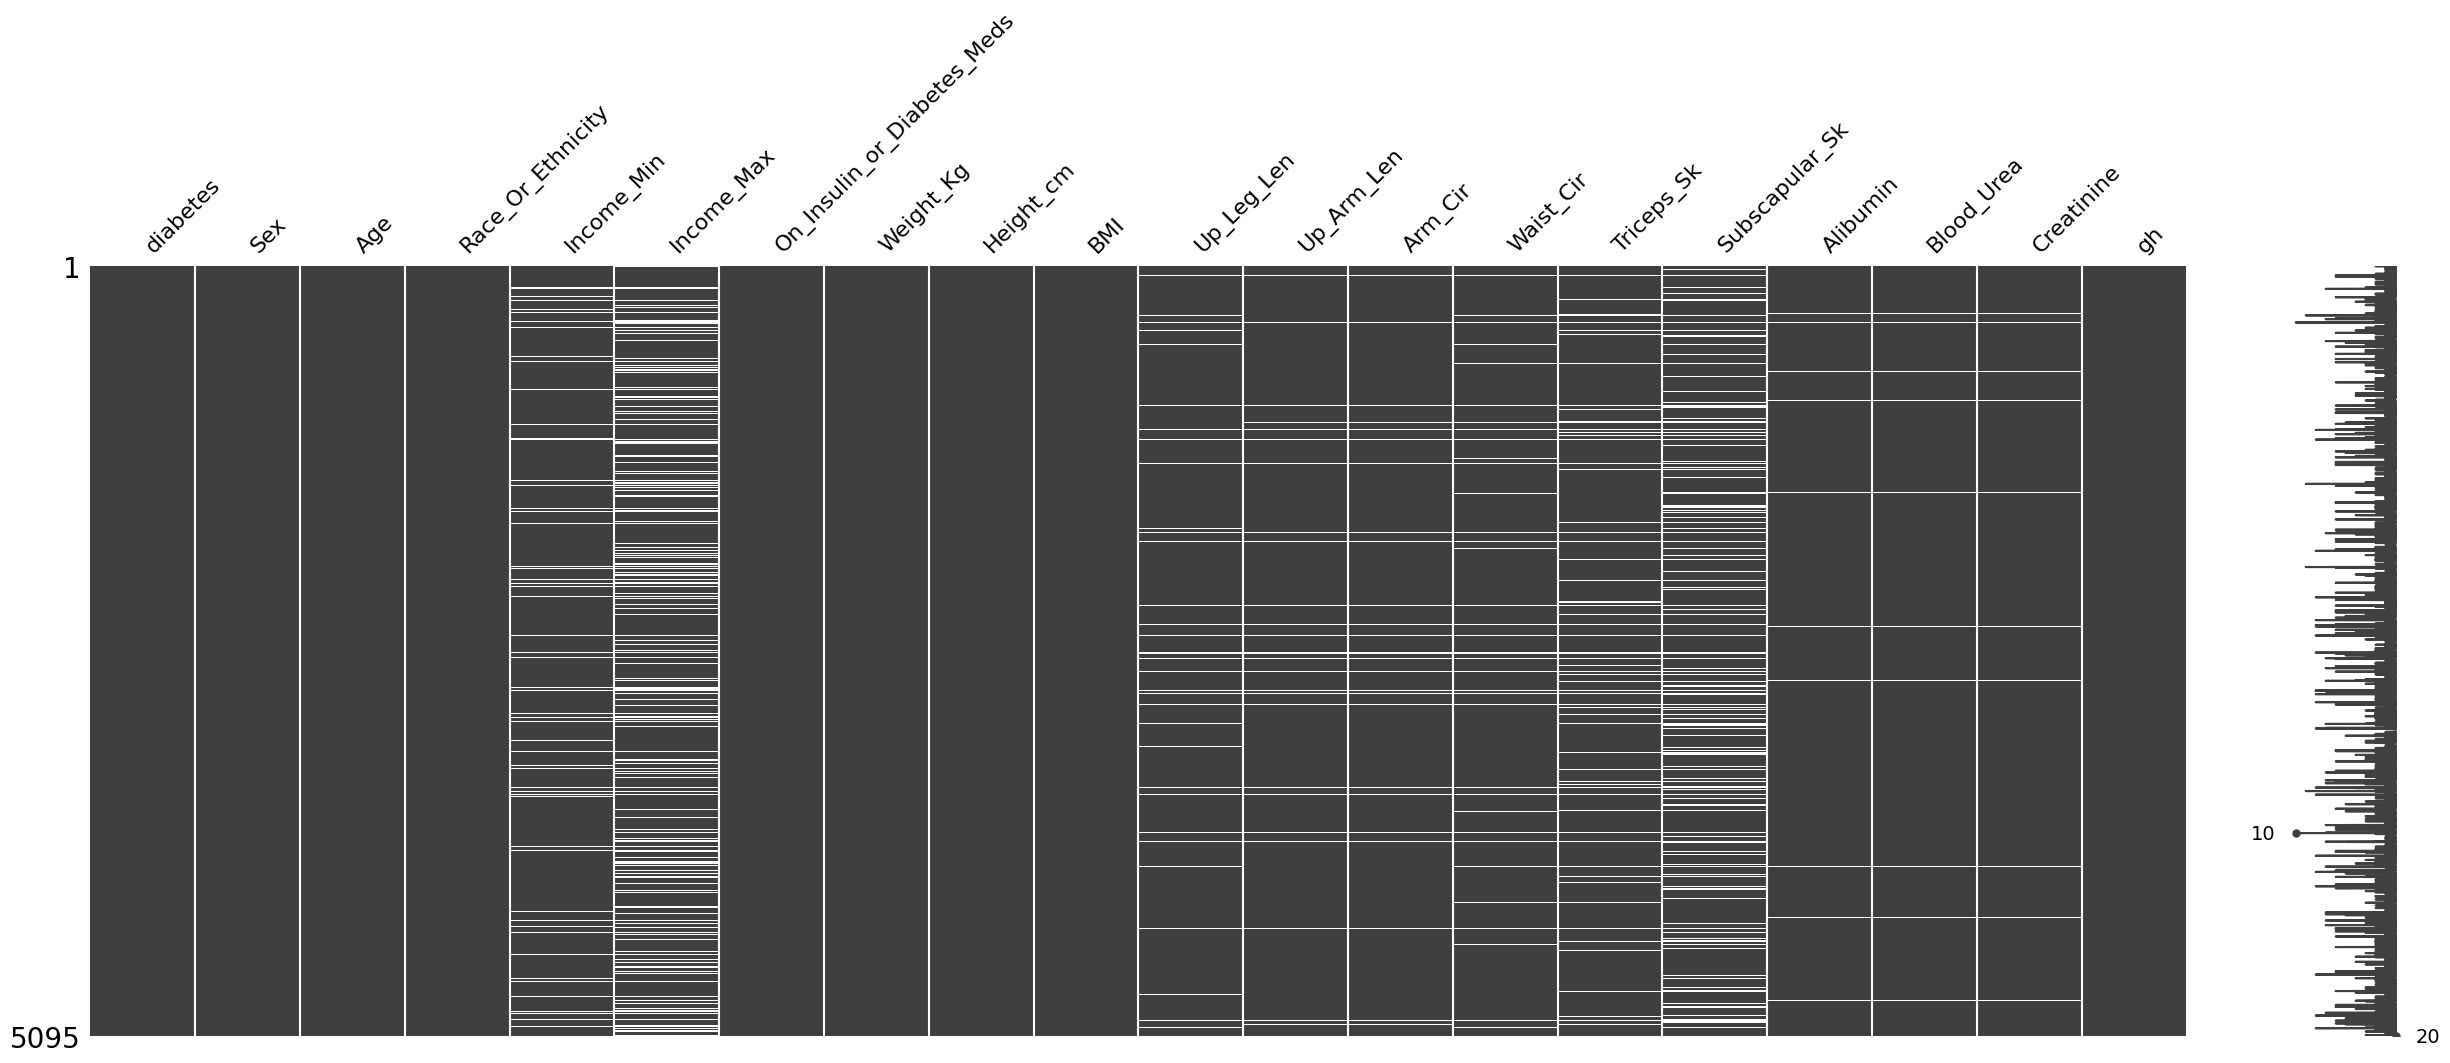

In [41]:
missingno.matrix(dftrain2, figsize = (30,10))

In [45]:
formula = (
    "diabetes ~ Sex + Age + Race_Or_Ethnicity + Income_Min + Income_Max + On_Insulin_or_Diabetes_Meds + Weight_Kg + Height_cm + BMI + Up_Leg_Len + Up_Arm_Len + Arm_Cir + Waist_Cir + Triceps_Sk + Subscapular_Sk + Alibumin + Blood_Urea + Creatinine + gh"
)
mlr_full_2 = ols(formula, dftrain).fit()

print(mlr_full_2.summary())
print('\nMSE =', mlr_full_2.mse_resid)


#formula = (
#    "diabetes ~ Sex + Age + On_Insulin_or_Diabetes_Meds + Height_cm + BMI + Arm_Cir + Waist_Cir + Alibumin + Blood_Urea + Creatinine + gh"
#)
#mlr_full_2 = ols(formula, dftrain).fit()

#print(mlr_full_2.summary())
#print('\nMSE =', mlr_full_2.mse_resid)

                            OLS Regression Results                            
Dep. Variable:               diabetes   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     265.9
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        12:19:59   Log-Likelihood:                 608.35
No. Observations:                3238   AIC:                            -1177.
Df Residuals:                    3218   BIC:                            -1055.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

### The 2nd model has no difference to previous model.
### However, MSE is about the same.

# Perform Backward Selection based on p-Values. Removed predictor with p-Values higher than 0.05 

In [48]:
# Perform Backward Selection based on p-Values. Removed predictor with p-Values higher than 0.05 
#"diabetes ~ Sex + Age +  Income_Max + On_Insulin_or_Diabetes_Meds + Up_Leg_Len + Creatinine + gh"
mlr_full_3 = ols(  "diabetes ~  Age + On_Insulin_or_Diabetes_Meds + Height_cm + BMI + Arm_Cir + Waist_Cir + Alibumin + Blood_Urea + Creatinine + gh", dftrain2).fit()

#mlr_full_3 = ols(  "diabetes ~ Sex + Age + On_Insulin_or_Diabetes_Meds + Height_cm + BMI + Arm_Cir + Waist_Cir + Alibumin + Blood_Urea + Creatinine + gh", dftrain2).fit()
print(mlr_full_3.summary())
print('\nMSE =', mlr_full_3.mse_resid)

                            OLS Regression Results                            
Dep. Variable:               diabetes   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     783.8
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        12:30:02   Log-Likelihood:                 753.62
No. Observations:                4838   AIC:                            -1485.
Df Residuals:                    4827   BIC:                            -1414.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [66]:
# Perform Backward Selection based on p-Values. Removed predictor with p-Values higher than 0.05 

mlr_full_3 = ols(  "diabetes ~ Age + On_Insulin_or_Diabetes_Meds + BMI + Creatinine + gh", dftrain2).fit()
print(mlr_full_3.summary())
print('\nMSE =', mlr_full_3.mse_resid)

                            OLS Regression Results                            
Dep. Variable:               diabetes   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     1640.
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        12:37:48   Log-Likelihood:                 736.42
No. Observations:                5031   AIC:                            -1461.
Df Residuals:                    5025   BIC:                            -1422.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

### The MSE of the models are slightly getting lower after removing the predictors (p-value > 0.05).
### Adj. R2 has slightly improved. (62%)


In [49]:
res3 = mlr_full_3.resid
len(res3)

4838

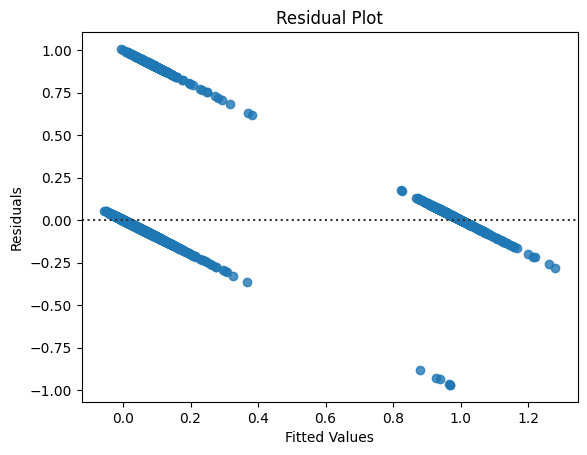

In [50]:
sns.residplot(x=mlr_full_3.fittedvalues, y=res3)
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()
#non linear pattern

In [51]:
### The residual plot is about the same as above.

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

for i in range(6):
    predictor = mlr_full_3.model.exog_names[i]
    Vif3 = vif(mlr_full_3.model.exog,i)
    print(predictor,Vif3)

Intercept 580.8932588211743
Age 1.8482677447172386
On_Insulin_or_Diabetes_Meds 1.4994464890949895
Height_cm 2.047171850276534
BMI 16.531247060674165
Arm_Cir 7.4651800718503525


### The multicollinearity problem has improved. It becomes moderately correlated for individual predictors (1<VIF<5).

# 3. Create interaction of variables

In [57]:
# Create interation of variables
#"diabetes ~ Age + On_Insulin_or_Diabetes_Meds + BMI + Height_cm +  Creatinine + gh"
#"diabetes ~ Age + On_Insulin_or_Diabetes_Meds + BMI + Creatinine + gh"
mlr_full_4 = ols("diabetes ~ Age + On_Insulin_or_Diabetes_Meds + BMI + Creatinine + gh + BMI*Creatinine + On_Insulin_or_Diabetes_Meds*gh", dftrain2).fit()
print(mlr_full_4.summary())
print('\nMSE =', mlr_full_4.mse_resid)

                            OLS Regression Results                            
Dep. Variable:               diabetes   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     1191.
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        12:33:44   Log-Likelihood:                 762.66
No. Observations:                5031   AIC:                            -1509.
Df Residuals:                    5023   BIC:                            -1457.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

### Adj. R2 has been improved. (62.4%)
### The MSE of this model is getting lower. (0.0432)
### Cond. No. is 4.16e+03.

# 4. Transform variables (5th Model)

In [61]:
mlr_full_5 = ols("diabetes ~ Age + I(On_Insulin_or_Diabetes_Meds**2) + BMI +  Creatinine + gh  + On_Insulin_or_Diabetes_Meds*gh", dftrain2).fit()
print(mlr_full_5.summary())
print('\nMSE =', mlr_full_5.mse_resid)

                            OLS Regression Results                            
Dep. Variable:               diabetes   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     1390.
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        12:35:42   Log-Likelihood:                 762.66
No. Observations:                5031   AIC:                            -1511.
Df Residuals:                    5024   BIC:                            -1466.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [67]:
res5 = mlr_full_5.resid
len(res5)

5031

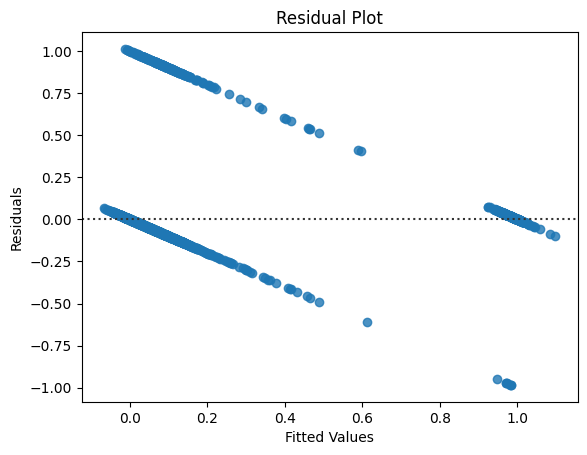

In [68]:
sns.residplot(x=mlr_full_5.fittedvalues, y=res5)
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()
#linear pattern

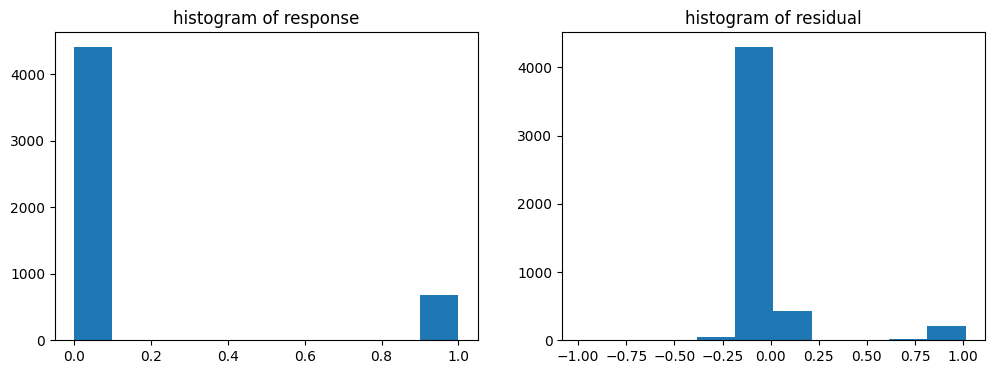

In [69]:
# To inspect skewness, produce histograms
fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(121)
plt.hist(dftrain2.diabetes)  # the response Y
plt.title('histogram of response');

ax = fig.add_subplot(122)
plt.hist(res5)  # the residuals
plt.title('histogram of residual');

## Both plot are right skewiness

### Apparently, Normailty is still not stablized for the variance.

Using multilinear regression for a binary response variable is not appropriate because multilinear regression assumes a continuous response variable. For binary response data, logistic regression is typically used instead. Here’s why:


Multilinear Regression

- Assumptions:
    - The response variable is continuous.
    - The relationship between predictors and the response variable is linear.
    - Errors are normally distributed with constant variance (homoscedasticity).

When the response variable is binary (e.g., 0 or 1), these assumptions are violated. Specifically:

    - The response variable is not continuous.
    - The error terms do not follow a normal distribution.
    - The relationship between predictors and the binary response is not necessarily linear.

Logistic Regression

- Appropriate for Binary Response:
    - Logistic regression models the probability that the response variable equals a particular value (e.g., 1).
    - It uses the logistic function to ensure the predicted probabilities are between 0 and 1.
    - The model estimates the log-odds of the response variable as a linear combination of the predictor variables.

# Conclusion

### This is a show case to use statistcal functions to demostrate the use of visualization with the NHGH dataset in python notebook. For a binary response variable, logistic regression is the appropriate choice. It accounts for the binary nature of the response variable and models the probability of the occurrence of an event.

In [75]:
dfx = pd.read_excel('Glycohemoglobin_t4_ShortName.xlsx')

In [76]:
# Split data set into 75:25.

from sklearn.model_selection import train_test_split
dfxtrain, dfxtest = train_test_split(dfx, test_size=0.25, random_state=1938)

# If you want to confirm ratio splitted:
print( len(dfxtrain)/len(dfx) )
print( len(dfxtest)/len(dfx) )

0.749963208241354
0.25003679175864607


In [77]:
formula = (
    "gh ~ Sex + Age + Race_Or_Ethnicity + Income_Min + Income_Max + On_Insulin_or_Diabetes_Meds + Weight_Kg + Height_cm + BMI + Up_Leg_Len + Up_Arm_Len + Arm_Cir + Waist_Cir + Triceps_Sk + Subscapular_Sk + Alibumin + Blood_Urea + Creatinine + diabetes"
)
mlr_full_x = ols(formula, dfxtrain).fit()

print(mlr_full_x.summary())
print('\nMSE =', mlr_full_x.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                     gh   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     110.4
Date:                Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                        13:14:58   Log-Likelihood:                -3442.7
No. Observations:                3238   AIC:                             6925.
Df Residuals:                    3218   BIC:                             7047.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         